In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [3]:
tesla_article_table = pd.read_excel("/Users/anandsingh/Desktop/stock_predictor/Tesla/results/tesla_article_table.xlsx",index_col=0)

In [166]:
concatenated_table = pd.read_excel("/Users/anandsingh/Desktop/stock_predictor/Tesla/results/concatenated_table.xlsx",index_col=0)

In [167]:
tesla_article_table.head()

,Date,Articles,compound,pos,neg,neu
0,01/20/23,Wall St Week Ahead-Tech stock rebound faces do...,-0.3182,0.000,0.119,0.881
1,01/20/23,Should You Buy the Dip on Rivian Stock in 2023...,0.9932,0.133,0.066,0.801
2,01/20/23,"Pre-Market Most Active for Jan 20, 2023 : TQQQ...",0.9886,0.126,0.011,0.863
3,01/20/23,Tesla Causes Used Car Prices to Plunge -- What...,-0.4926,0.076,0.090,0.834
4,01/20/23,FOCUS-Here's what Twitter lost in advertising ...,0.9956,0.093,0.041,0.866


In [168]:
concatenated_table.head()

,compound,pos,neg,neu,Day,Change
Date,,,,,,
01/19/23,0.291800,0.088957,0.044043,0.867087,Thursday,4.74
01/18/23,0.779860,0.109667,0.049667,0.840667,Wednesday,-0.09
01/17/23,0.353565,0.083000,0.061192,0.855808,Tuesday,-7.78
01/13/23,0.721276,0.102138,0.059138,0.838759,Friday,5.80
01/12/23,0.675290,0.095429,0.038143,0.866381,Thursday,5.85


In [178]:
#concatenated table with nan values for commulated_compound coloumn
concatenated_table['Commulated compound'] = 0
concatenated_table['Commulated change'] = 0

In [179]:
concatenated_table

,compound,pos,neg,neu,Day,Change,Commulated compound,Commulated change
Date,,,,,,,,
01/19/23,0.291800,0.088957,0.044043,0.867087,Thursday,4.74,0,0
01/18/23,0.779860,0.109667,0.049667,0.840667,Wednesday,-0.09,0,0
01/17/23,0.353565,0.083000,0.061192,0.855808,Tuesday,-7.78,0,0
01/13/23,0.721276,0.102138,0.059138,0.838759,Friday,5.80,0,0
01/12/23,0.675290,0.095429,0.038143,0.866381,Thursday,5.85,0,0
...,...,...,...,...,...,...,...,...
05/17/21,0.641222,0.088122,0.046878,0.865061,Monday,3.29,0,0
05/14/21,0.699909,0.103000,0.052529,0.844559,Friday,0.43,0,0
05/13/21,0.461547,0.086745,0.056468,0.856766,Thursday,2.11,0,0


In [180]:
# Reverse rows using iloc() Function
concatenated_table = concatenated_table.iloc[::-1]

In [181]:
concatenated_table

,compound,pos,neg,neu,Day,Change,Commulated compound,Commulated change
Date,,,,,,,,
05/11/21,0.451385,0.082923,0.052885,0.864192,Tuesday,-4.20,0,0
05/12/21,0.542910,0.090355,0.052032,0.857645,Wednesday,-9.95,0,0
05/13/21,0.461547,0.086745,0.056468,0.856766,Thursday,2.11,0,0
05/14/21,0.699909,0.103000,0.052529,0.844559,Friday,0.43,0,0
05/17/21,0.641222,0.088122,0.046878,0.865061,Monday,3.29,0,0
...,...,...,...,...,...,...,...,...
01/12/23,0.675290,0.095429,0.038143,0.866381,Thursday,5.85,0,0
01/13/23,0.721276,0.102138,0.059138,0.838759,Friday,5.80,0,0
01/17/23,0.353565,0.083000,0.061192,0.855808,Tuesday,-7.78,0,0


In [192]:
concatenated_table['compound'] = concatenated_table['compound'] - 0.5

In [193]:
concatenated_table

,compound,pos,neg,neu,Day,Change,Commulated compound,Commulated change
Date,,,,,,,,
05/11/21,-0.048615,0.082923,0.052885,0.864192,Tuesday,-4.20,0.451385,-4.20
05/12/21,0.042910,0.090355,0.052032,0.857645,Wednesday,-9.95,0.994294,-14.15
05/13/21,-0.038453,0.086745,0.056468,0.856766,Thursday,2.11,1.455841,-12.04
05/14/21,0.199909,0.103000,0.052529,0.844559,Friday,0.43,2.155750,-11.61
05/17/21,0.141222,0.088122,0.046878,0.865061,Monday,3.29,2.796972,-8.32
...,...,...,...,...,...,...,...,...
01/12/23,0.175290,0.095429,0.038143,0.866381,Thursday,5.85,283.257820,-180.91
01/13/23,0.221276,0.102138,0.059138,0.838759,Friday,5.80,283.979096,-175.11
01/17/23,-0.146435,0.083000,0.061192,0.855808,Tuesday,-7.78,284.332662,-182.89


In [194]:

for i in range(0,concatenated_table.shape[0]):
    if i == 0:
        concatenated_table.iloc[i,6] = concatenated_table.iloc[0,0] # for commulated compound
        concatenated_table.iloc[i,7] = concatenated_table.iloc[0,5] # for commulated change
    else:
        concatenated_table.iloc[i,6] = concatenated_table.iloc[i-1,6] + concatenated_table.iloc[i,0]
        concatenated_table.iloc[i,7] = concatenated_table.iloc[i-1,7] + concatenated_table.iloc[i,5]

In [195]:
concatenated_table

,compound,pos,neg,neu,Day,Change,Commulated compound,Commulated change
Date,,,,,,,,
05/11/21,-0.048615,0.082923,0.052885,0.864192,Tuesday,-4.20,-0.048615,-4.20
05/12/21,0.042910,0.090355,0.052032,0.857645,Wednesday,-9.95,-0.005706,-14.15
05/13/21,-0.038453,0.086745,0.056468,0.856766,Thursday,2.11,-0.044159,-12.04
05/14/21,0.199909,0.103000,0.052529,0.844559,Friday,0.43,0.155750,-11.61
05/17/21,0.141222,0.088122,0.046878,0.865061,Monday,3.29,0.296972,-8.32
...,...,...,...,...,...,...,...,...
01/12/23,0.175290,0.095429,0.038143,0.866381,Thursday,5.85,71.757820,-180.91
01/13/23,0.221276,0.102138,0.059138,0.838759,Friday,5.80,71.979096,-175.11
01/17/23,-0.146435,0.083000,0.061192,0.855808,Tuesday,-7.78,71.832662,-182.89


In [196]:
x = concatenated_table['Commulated compound']

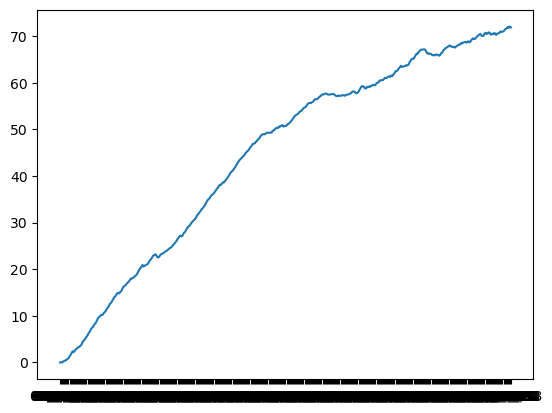

In [197]:
plt.plot(x)

In [190]:
y = concatenated_table['Commulated change']

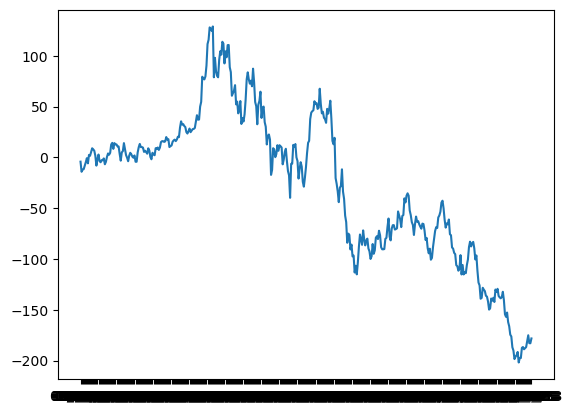

In [191]:
plt.plot(y)

In [102]:
from sklearn.decomposition import PCA

In [117]:
pca = PCA(n_components=1)

In [119]:
#concatenated_table = concatenated_table.drop(['Day'],axis=1)
pca.fit(concatenated_table)

PCA(n_components=1)

In [120]:
x_pca = pca.transform(concatenated_table)

In [121]:
concatenated_table.shape

(427, 5)

In [122]:
x_pca.shape

(427, 1)

In [123]:
concatenated_table['Change']

Date
01/19/23    4.74
01/18/23   -0.09
01/17/23   -7.78
01/13/23    5.80
01/12/23    5.85
            ... 
05/17/21    3.29
05/14/21    0.43
05/13/21    2.11
05/12/21   -9.95
05/11/21   -4.20
Name: Change, Length: 427, dtype: float64

IndexError: index 1 is out of bounds for axis 1 with size 1

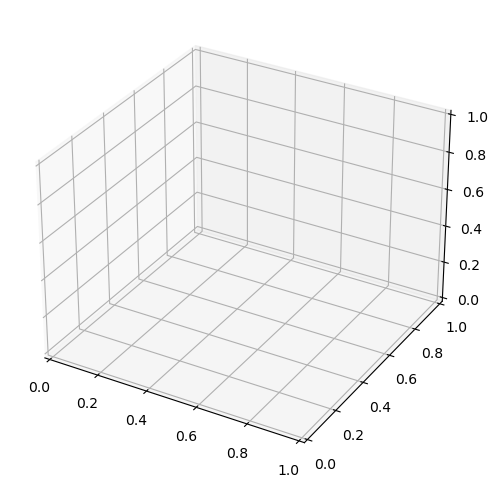

In [124]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=concatenated_table['Change'],cmap='plasma')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

### First, second, third PCs are weighted sums of feature, they don't represent which 3 features have most weight. We can check that by plotting a heat map though. 

### Heat map to check relative weights of each feature in a PC. Though, it's impractical for 1000s for features. (Plot will look messed) 

In [125]:
pca.components_

array([[-5.90571931e-04, -4.52311084e-05,  2.69789938e-05,
         1.75753713e-05, -9.99999824e-01]])

In [126]:
df_comp = pd.DataFrame(pca.components_,columns=concatenated_table.columns)

<AxesSubplot:>

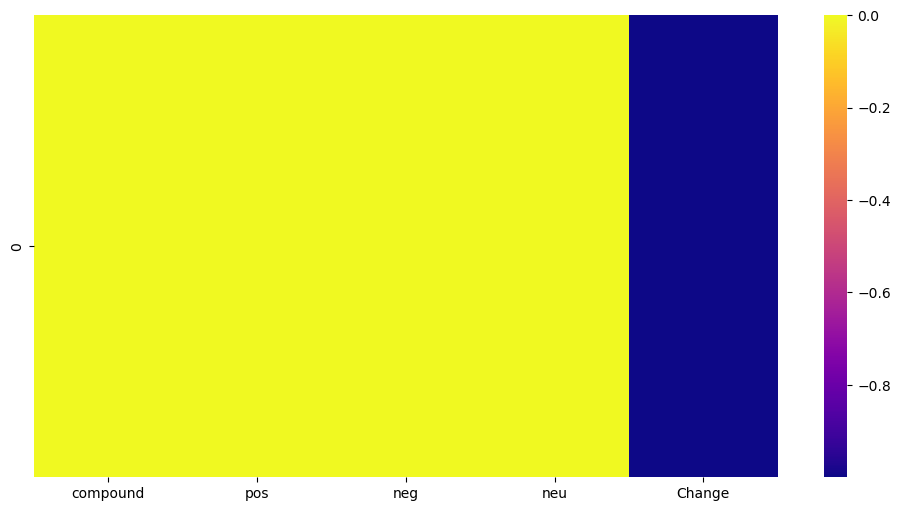

In [127]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)